In [96]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
df = pd.read_excel('Online retail.xlsx')

In [98]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [99]:
!pip install mlxtend

In [100]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [101]:
from mlxtend.frequent_patterns import apriori , association_rules

In [102]:
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [103]:
df.columns = ['items'] # column name set to items

In [104]:
df

,items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [105]:
new_row = pd.DataFrame({'items': ['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil']})
df = pd.concat([df, new_row], ignore_index=True) # readding since i lost first row data while naming the column

In [106]:
df[df['items'] == 'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil']

,items
7500,"shrimp,almonds,avocado,vegetables mix,green gr..."


In [107]:
df.isnull().sum() # no null value present

items    0
dtype: int64

In [108]:
df = df.drop_duplicates() # deleted duplicates

In [109]:
df # which leads to reduction of rows from 7.5k to 5.1k

,items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7493,"turkey,burgers,dessert wine,shrimp,pasta,tomat..."
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7499,"eggs,frozen smoothie,yogurt cake,low fat yogurt"


In [110]:
df['items'] = df['items'].str.lower().str.strip() #making sure each element is in lower order + seprarted by , 

In [111]:
df['items'].count()

np.int64(5176)

In [119]:
# Create a one-hot encoded dataframe
from mlxtend.preprocessing import TransactionEncoder

# Convert each items into a list of items (split by comma if multiple items in one cell)
transactions = df['items'].apply(lambda x: [item.strip() for item in x.split(',')]).tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

basket_sets = pd.DataFrame(te_ary, columns=te.columns_)

# print(transactions)

In [113]:
print(basket_sets.head())
print(basket_sets.sum()) 

   almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0    False              False      False    False        False  False   
1    False              False      False    False        False  False   
2    False              False      False     True        False  False   
3    False              False      False    False        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...    True   
3           False      False        False       False  ...   False   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0           False        False       False             False   
1           

In [115]:
from mlxtend.frequent_patterns import apriori, association_rules

# Frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# filter rules by confidence
rules = rules[(rules['confidence'] >= 0.5)] # for 0.5

print(rules[['antecedents','consequents','support','confidence','lift']])


                          antecedents      consequents   support  confidence  \
304              (chicken, chocolate)  (mineral water)  0.011012    0.518182   
395            (chocolate, olive oil)  (mineral water)  0.011978    0.508197   
456               (eggs, ground beef)  (mineral water)  0.014490    0.503356   
490  (frozen vegetables, ground beef)  (mineral water)  0.013331    0.543307   
498  (frozen vegetables, ground beef)      (spaghetti)  0.012558    0.511811   
529               (ground beef, milk)  (mineral water)  0.016036    0.506098   
540           (pancakes, ground beef)  (mineral water)  0.010819    0.518519   
554                 (milk, olive oil)  (mineral water)  0.012365    0.512000   
572                      (soup, milk)  (mineral water)  0.012365    0.576577   
607                 (spaghetti, soup)  (mineral water)  0.010819    0.523364   

         lift  
304  1.728163  
395  1.694862  
456  1.678717  
490  1.811957  
498  2.229911  
529  1.687861  
540  1.

In [121]:
print(frequent_itemsets.sort_values(by="support", ascending=False).head(10))


     support             itemsets
54  0.299845      (mineral water)
73  0.229521          (spaghetti)
24  0.208076               (eggs)
17  0.205178          (chocolate)
30  0.192620       (french fries)
53  0.170015               (milk)
40  0.169243          (green tea)
41  0.135819        (ground beef)
36  0.129830  (frozen vegetables)
61  0.125193           (pancakes)


In [124]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# filter for higher confidence
rules = rules[rules['confidence'] >= 0.2] # for 0.2

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(100))


        antecedents      consequents   support  confidence      lift
0         (almonds)  (mineral water)  0.011012    0.375000  1.250644
3         (avocado)      (chocolate)  0.010240    0.222689  1.085347
5         (avocado)   (french fries)  0.011592    0.252101  1.308800
7         (avocado)           (milk)  0.010819    0.235294  1.383957
9         (avocado)  (mineral water)  0.016036    0.348739  1.163064
..              ...              ...       ...         ...       ...
222      (pancakes)   (french fries)  0.028014    0.223765  1.161695
225  (tomato juice)   (french fries)  0.010240    0.242009  1.256408
229   (french wine)  (mineral water)  0.011978    0.369048  1.230793
231   (french wine)      (spaghetti)  0.011206    0.345238  1.504169
232   (fresh bread)           (milk)  0.013331    0.224756  1.321972

[100 rows x 5 columns]


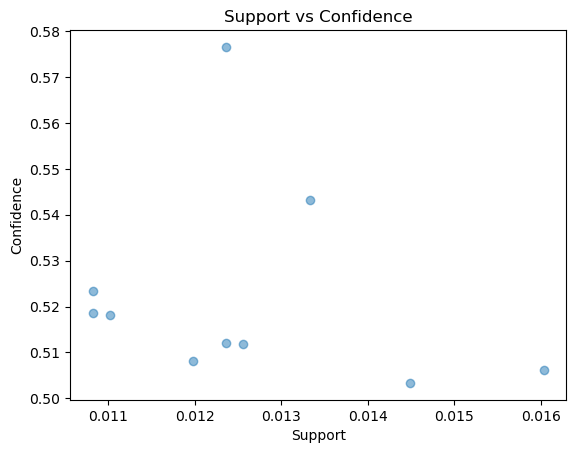

In [118]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()
